# IRIS DATASET

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#reading the excel file using pandas
df = pd.read_excel('iris.xls')

In [3]:
#generating the first five rows of the data
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Understanding the structure of data 

In [4]:
#Shape of the data
df.shape

(150, 5)

In [5]:
#Checking the columns
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [6]:
#information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# to display no. of samples on each class
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [8]:
#Statistical summary of data
df.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#Checking the null values
df.isnull().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

There are null values present in SL,SW and PL columns

# Exploratory data analysis

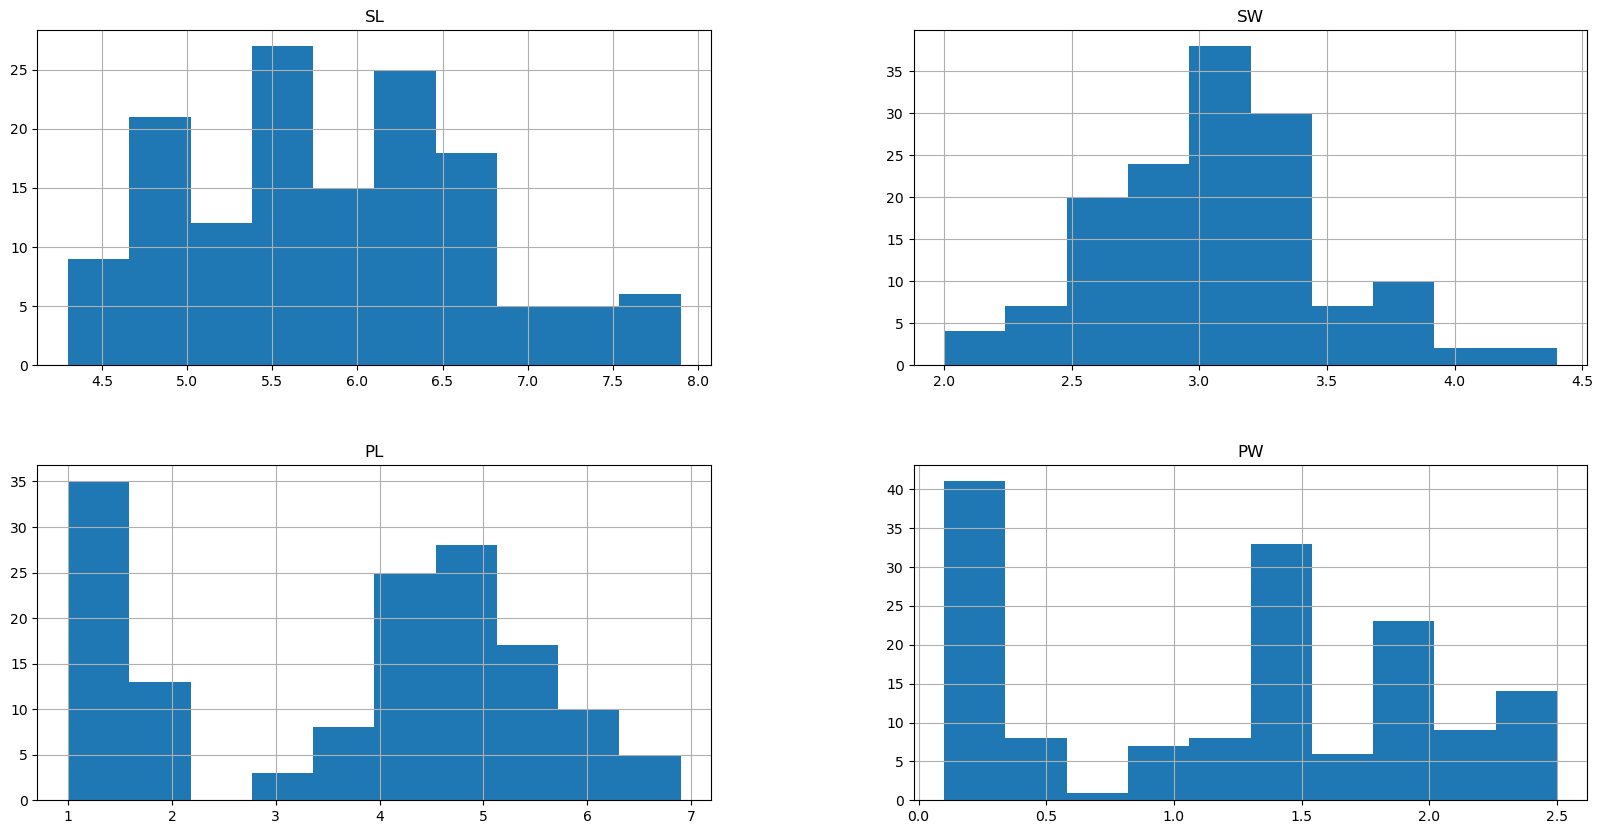

In [10]:
freqgraph = df.select_dtypes(include = ['float'])
freqgraph.hist(figsize = (20,10))
plt.show()

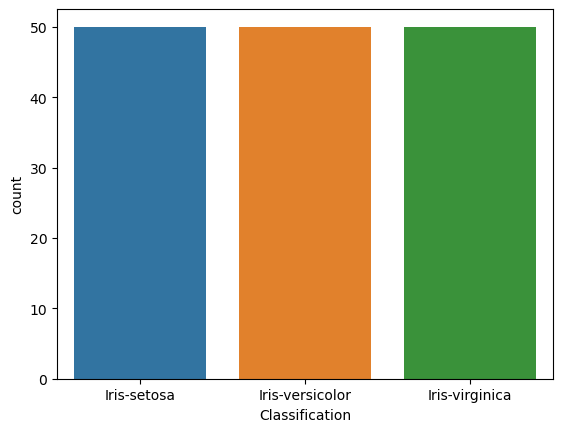

In [11]:
#countplot of target column
sns.countplot(x='Classification', data=df, )
plt.show()

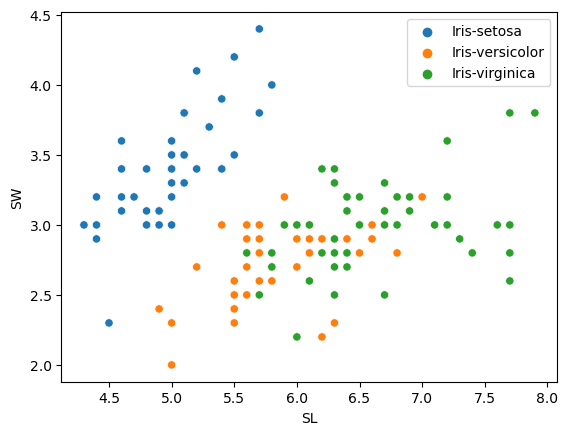

In [12]:
#Comparing Sepal Length and Sepal Width
sns.scatterplot(x='SL', y='SW',hue='Classification', data=df, )
plt.legend()
plt.show()

From the above plot, we get to know that:

1. Species Setosa has smaller sepal lengths but larger sepal widths.
2. Versicolor Species lies in the middle of the other two species in terms of sepal length and width
3. Species Virginica has larger sepal lengths but smaller sepal widths.

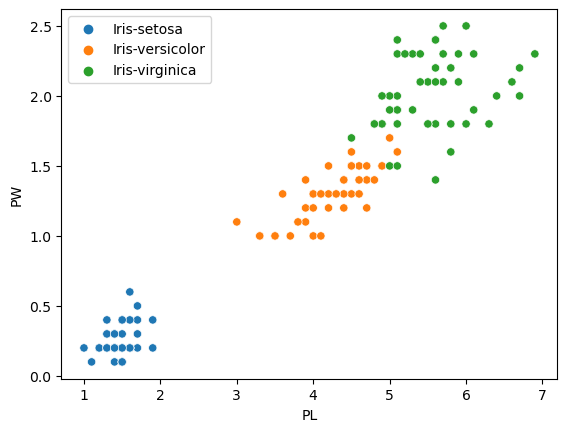

In [13]:
# Comparing Petal Length and Petal Width
sns.scatterplot(x='PL', y='PW', hue='Classification', data=df, )
plt.legend()
plt.show()

From the above plot, we get to know that :

1. Species Setosa has smaller petal lengths and widths.
2. Versicolor Species lies in the middle of the other two species in terms of petal length and width
3. Species Virginica has the largest of petal lengths and widths.

# Data Preprocessing

On observing the histograms SL,SW and PL are normally distributed. Thus, the null values can be filled by the
mean of the respective columns.

In [14]:
#Removing null values
df['SL'] = df['SL'].fillna(df['SL'].mean())
df['SW'] = df['SW'].fillna(df['SW'].mean())
df['PL'] = df['PL'].fillna(df['PL'].mean())

In [15]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<AxesSubplot:>

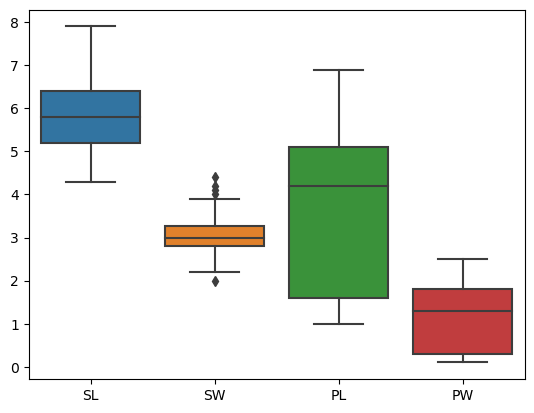

In [16]:
#checking outliers
sns.boxplot(data=df)

<AxesSubplot:xlabel='SW'>

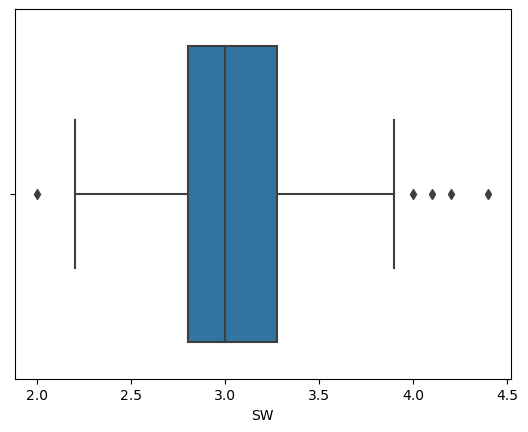

In [17]:
#Outlier of SW
sns.boxplot(x = 'SW',data = df)

There are outliers present in SW

In [18]:
#Finding first,second and third quartile
Q1 = np.percentile(df['SW'],25,interpolation = 'midpoint')
Q2 = np.percentile(df['SW'],50,interpolation = 'midpoint')
Q3 = np.percentile(df['SW'],75,interpolation = 'midpoint')

In [19]:
#printing Q1,Q2 and Q3
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [20]:
#finding the mean of price column
df['SW'].mean()

3.0493055555555566

In [21]:
#finding the Inter Quartile Range(IQR)
IQR = Q3 - Q1
IQR

0.4500000000000002

In [22]:
low_limit = Q1 - 1.5*IQR
upper_limit = Q3+1.5*IQR


In [23]:
outlier = []
for x in df['SW']:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)

In [24]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [25]:
#finding the index of the outlier
ind1 = df['SW']<low_limit
df.loc[ind1].index

Int64Index([60], dtype='int64')

In [26]:
ind1 = df['SW']>upper_limit
df.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [27]:
#dropping indexes
df.drop([14,15,32,33,60], inplace = True)

In [28]:
#correlation
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.102897,0.843994,0.808888
SW,-0.102897,1.000000,-0.372659,-0.296118
PL,0.843994,-0.372659,1.000000,0.933586
PW,0.808888,-0.296118,0.933586,1.000000


<AxesSubplot:>

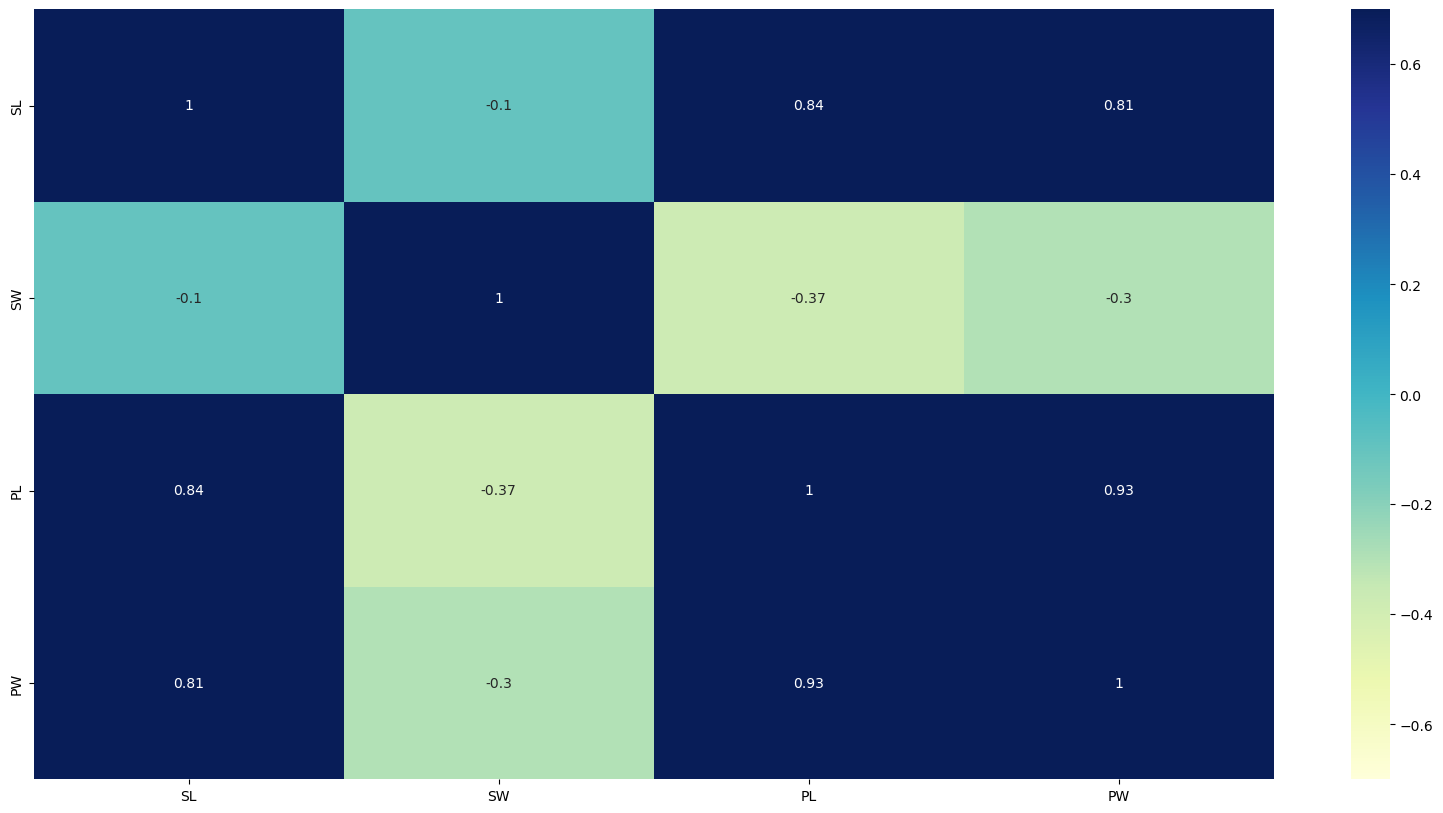

In [29]:
#Checking the correlation between variables using heatmap
corrmatrix = df.corr()
plt.subplots(figsize =(20,10))
sns.heatmap(corrmatrix,annot = True,vmax=0.7,vmin = -.7,cmap ='YlGnBu')

From the heatmap:
1. Petal length and Sepal length have good correlation.
2. Petal width and petal length have high good correlation.
3. Sepal width and petal length have good correlation.

In [30]:
#Encoding categorical column "Classification" using labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
df['Classification'] = le.fit_transform(df['Classification'])

In [32]:
df.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


# Model Training


Splitting the data for training and tessting

In [33]:
y = df['Classification']                   #y is the dependent variable to be predicted      
x = df.drop(['Classification'],axis =1)    #x is the independent variables

In [34]:
#importing the sklearn library for splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.25,random_state = 42)

# 1. Logistic Regression

In [35]:
#importing logistic regression algorithm from sklearn library
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [36]:
#fitting the model
model = lr.fit(x_train,y_train)

In [37]:
#predicting 
y_pred = model.predict(x_test)

In [38]:
#Performance metrices
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy :',accuracy_score(y_test,y_pred)*100)

Accuracy : 89.1891891891892


In [39]:
#Confusion matrix
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

# 2. kNN

In [40]:
#importing knn algortithm
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,10)                     #value of k

#using for loop 
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    model=classifier.fit(x_train,y_train)    
    y_pred_knn = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)         #Accuracy of the model
    metric_k.append(acc)

In [41]:
print('Accuracy is :',acc*100)

Accuracy is : 91.8918918918919


In [42]:
metric_k

[0.918918918918919,
 0.8918918918918919,
 0.918918918918919,
 0.8648648648648649,
 0.8918918918918919,
 0.8378378378378378,
 0.918918918918919]

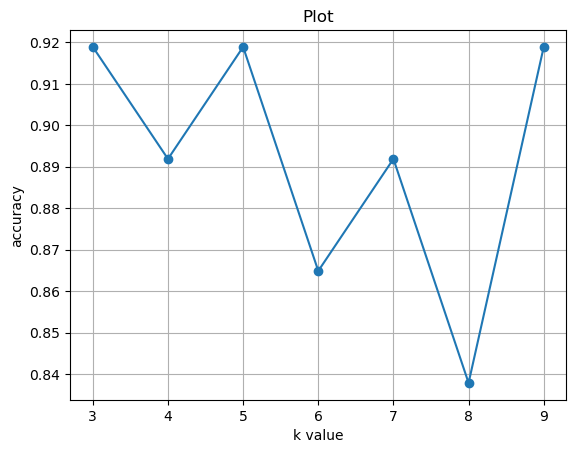

In [43]:
#plotting accuracy for varius values of k
plt.plot(neighbors,metric_k,'o-')
plt.title('Plot')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

# 3. Support Vector Machine (SVM)


In [44]:
#importing svm
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [45]:
y_pred_svm = svmclf.predict(x_test)
#performance metrices for evaluation
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy :',accuracy_score(y_test,y_pred_svm)*100)

Accuracy : 91.8918918918919


# 4. DecisionTree

In [46]:
#importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred_dt = dt_clf.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred_dt)*100)

Accuracy : 91.8918918918919


# 5. Random Forest

In [47]:
#importing random forest algorithm
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)
print('Accuracy :',accuracy_score(y_test,y_pred_rf) *100)

Accuracy : 94.5945945945946


# Conclusion

From the different classification models, the accuracy score obtained are as follows:

1. Logistic Regression = 89.18%
2. k-Nearest Neighbor =91.89%
3. Support Vector Machine(SVM) = 91.89%
4. Decision Tree = 91.89%
5. Random Forest = 94.59%

According to the obtained accuracy scores Random Forest is the classification model that gives the best result.